In [1]:
from kbmod.reprojection_utils import correct_parallax, correct_parallax2
from astropy.coordinates import EarthLocation, SkyCoord, solar_system_ephemeris
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HELIOCENTRIC_DISTANCE = 50.0
# Test at the equin
icrs_ra1 = 173.74513571 # range of 0-360
icrs_dec1 = 73.43426475 # perhaps set this to 10.
icrs_time1 = Time("2023-03-20T16:00:00", format="isot", scale="utc")
sc1 = SkyCoord(ra=icrs_ra1, dec=icrs_dec1, unit="deg")

with solar_system_ephemeris.set("de432s"):
    eq_loc = EarthLocation.of_site("ctio")

In [3]:
# Without bounds should default to `BFGS`, with bounds defaults to `L-BFGS-B`.

baseline_coord, baseline_geo_dist = correct_parallax(
    coord=sc1,
    obstime=icrs_time1,
    point_on_earth=eq_loc,
    heliocentric_distance=HELIOCENTRIC_DISTANCE,
    method=None,
    use_bounds=False,
)

In [4]:
print(f"ra:{baseline_coord.ra.deg}, dec:{baseline_coord.dec.deg}, distance:{baseline_geo_dist}")

ra:174.12876309275217, dec:72.33713233771965, distance:49.702219767718596


In [5]:
geometric_coord, geometric_geo_dist = correct_parallax2(
    coord=sc1,
    obstime=icrs_time1,
    point_on_earth=eq_loc,
    heliocentric_distance=HELIOCENTRIC_DISTANCE,
)

In [6]:
print(f"ra:{geometric_coord.ra.deg}, dec:{geometric_coord.dec.deg}, distance:{geometric_geo_dist}")

ra:174.12876318802248, dec:72.33713204769207, distance:49.70220655358769


In [7]:
arcsec_sep = baseline_coord.separation(geometric_coord).to("arcsec").value
print(f"Separation between baseline and geometric: {arcsec_sep} arcsec")

print(f"Differnece in distances {np.abs(baseline_geo_dist - geometric_geo_dist)} au")

Separation between baseline and geometric: 0.001049272420934149 arcsec
Differnece in distances 1.3214130902383658e-05 au


In [8]:
min_heliocentric_distance = 20
max_heliocentric_distance = 51
heliocentric_distance_step = 10

min_ra = 0
max_ra = 361
ra_step = 10

with solar_system_ephemeris.set("de432s"):
    eq_loc = EarthLocation.of_site("ctio")

all_separations = []
all_distance_diffs = []
for heliocentric_distance in range(min_heliocentric_distance, max_heliocentric_distance, heliocentric_distance_step):
    print(f"Working on heliocentric distance:{heliocentric_distance}")
    per_distance_separation = []
    per_distance_earth_dist_diff = []
    for ra in range(min_ra, max_ra, ra_step):

        icrs_ra1 = ra # range of 0-360
        icrs_dec1 = 10.0 # perhaps set this to 10.
        icrs_time1 = Time("2023-03-20T16:00:00", format="isot", scale="utc")
        sc1 = SkyCoord(ra=icrs_ra1, dec=icrs_dec1, unit="deg")

        baseline_coord, baseline_geo_dist = correct_parallax(
            coord=sc1,
            obstime=icrs_time1,
            point_on_earth=eq_loc,
            heliocentric_distance=heliocentric_distance,
            method=None,
            use_bounds=True,
        )

        geometric_coord, geometric_geo_dist = correct_parallax2(
            coord=sc1,
            obstime=icrs_time1,
            point_on_earth=eq_loc,
            heliocentric_distance=heliocentric_distance,
        )

        arcsec_sep = baseline_coord.separation(geometric_coord).to("arcsec").value
        per_distance_separation.append(arcsec_sep)
        per_distance_earth_dist_diff.append(np.abs(baseline_geo_dist - geometric_geo_dist))
    all_separations.append(per_distance_separation)
    all_distance_diffs.append(per_distance_earth_dist_diff)

Working on heliocentric distance:20
Working on heliocentric distance:30
Working on heliocentric distance:40
Working on heliocentric distance:50


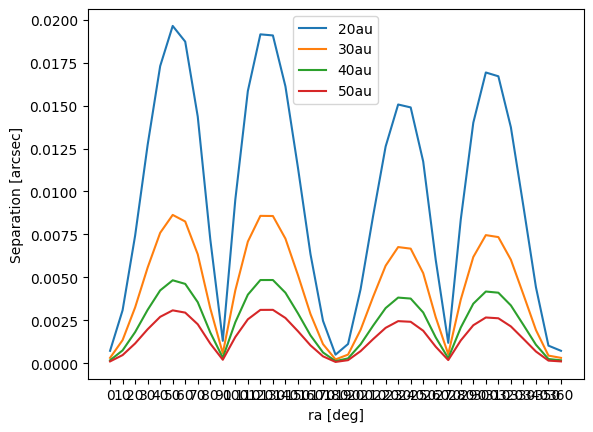

In [9]:
rng_obj = range(min_ra, max_ra, ra_step)
plt.plot(np.array(all_separations).T, label=[f"{i}au" for i in range(min_heliocentric_distance, max_heliocentric_distance, heliocentric_distance_step)])
plt.xticks(list(range(0,len(all_separations[0]))), list(rng_obj))
plt.xlabel("ra [deg]")
plt.ylabel("Separation [arcsec]")
plt.legend()
plt.show()

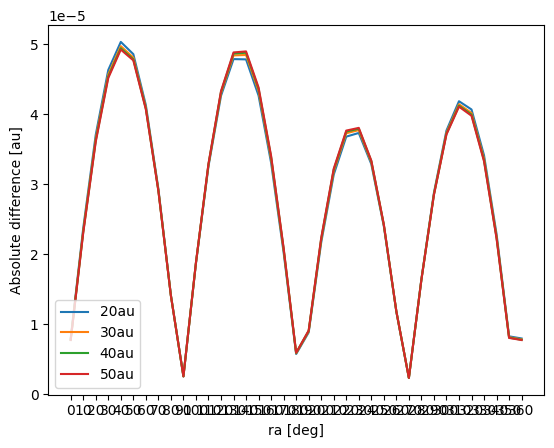

In [10]:
rng_obj = range(min_ra, max_ra, ra_step)
plt.plot(np.array(all_distance_diffs).T, label=[f"{i}au" for i in range(min_heliocentric_distance, max_heliocentric_distance, heliocentric_distance_step)])
plt.xticks(list(range(0,len(all_distance_diffs[0]))), list(rng_obj))
plt.xlabel("ra [deg]")
plt.ylabel("Absolute difference [au]")
plt.legend()
plt.show()

In [11]:
icrs_ra1 = 88.74513571
icrs_dec1 = 23.43426475
icrs_time1 = Time("2023-03-20T16:00:00", format="isot", scale="utc")

icrs_ra2 = 91.24261107
icrs_dec2 = 23.43437467
icrs_time2 = Time("2023-09-24T04:00:00", format="isot", scale="utc")

sc1 = SkyCoord(ra=icrs_ra1, dec=icrs_dec1, unit="deg")
sc2 = SkyCoord(ra=icrs_ra2, dec=icrs_dec2, unit="deg")

equinox_geo_dist = 50.00135417530472


corrected_coord1, _ = correct_parallax(
    coord=sc1,
    obstime=icrs_time1,
    point_on_earth=eq_loc,
    heliocentric_distance=50.0,
    use_bounds=True,
)

expected_ra = 90.0
expected_dec = 23.43952556

print(np.abs(corrected_coord1.ra.value - expected_ra))
print(np.abs(corrected_coord1.dec.value - expected_dec))

corrected_coord2, _ = correct_parallax(
    coord=sc2,
    obstime=icrs_time2,
    point_on_earth=eq_loc,
    heliocentric_distance=50.0,
    use_bounds=True,
)

print(np.abs(corrected_coord2.ra.value - expected_ra))
print(np.abs(corrected_coord2.dec.value - expected_dec))

corrected_coord3, _ = correct_parallax2(
    coord=sc1,
    obstime=icrs_time1,
    point_on_earth=eq_loc,
    heliocentric_distance=50.0,
)

expected_ra = 90.0
expected_dec = 23.43952556

print(np.abs(corrected_coord3.ra.value - expected_ra))
print(np.abs(corrected_coord3.dec.value - expected_dec))

corrected_coord4, _ = correct_parallax2(
    coord=sc2,
    obstime=icrs_time2,
    point_on_earth=eq_loc,
    heliocentric_distance=50.0,
)

print(np.abs(corrected_coord4.ra.value - expected_ra))
print(np.abs(corrected_coord4.dec.value - expected_dec))

4.694584276876412e-09
3.4186946606951096e-09
4.944666898154537e-10
2.5229631717138545e-09
1.8828373526957876e-08
3.415927096739324e-09
1.4868192010908388e-08
2.525659681396064e-09
